In [1]:
import numpy as np
import pandas as pd

In [2]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats import anova



In [3]:
df = pd.read_csv('Loan_Data.csv')

In [4]:
df1 = df

In [5]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

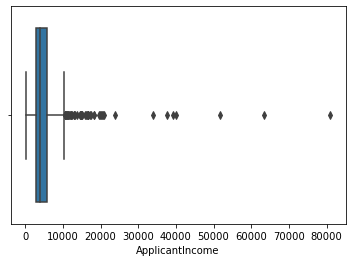

In [9]:
import seaborn as sns
sns.boxplot(df1['ApplicantIncome']) 

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median') 

In [11]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df1['LoanAmount'] = imputer.fit_transform(np.array(df1['LoanAmount']).reshape(-1, 1))

In [13]:
df1['Loan_Amount_Term'] = imputer.fit_transform(np.array(df1['Loan_Amount_Term']).reshape(-1, 1))

In [14]:
imputer1 = SimpleImputer(strategy ='most_frequent') 

In [15]:
df1['Credit_History'] = imputer1.fit_transform(np.array(df1['Credit_History']).reshape(-1, 1))

In [16]:
df1['Self_Employed'] = imputer1.fit_transform(np.array(df1['Self_Employed']).reshape(-1, 1))

In [17]:
df1['Dependents'] = imputer1.fit_transform(np.array(df1['Dependents']).reshape(-1, 1))

In [18]:
df1['Married'] = imputer1.fit_transform(np.array(df1['Married']).reshape(-1, 1))

In [19]:
df1['Gender'] = imputer1.fit_transform(np.array(df1['Gender']).reshape(-1, 1))

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

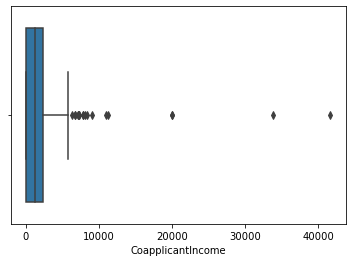

In [20]:
sns.boxplot(df1['CoapplicantIncome']) 

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

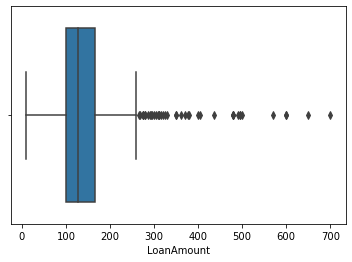

In [21]:
sns.boxplot(df1['LoanAmount'])

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

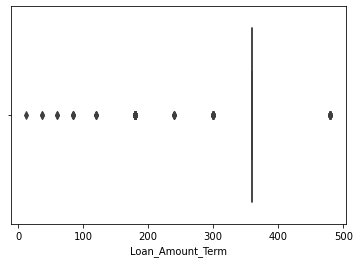

In [22]:
sns.boxplot(df1['Loan_Amount_Term']) 

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History'>

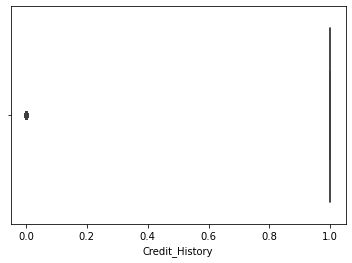

In [23]:
sns.boxplot(df1['Credit_History'])

In [24]:
df1.shape

(614, 13)

In [25]:
#from sklearn.impute import SimpleImputer

In [26]:
#imputer = SimpleImputer(strategy ='most_frequent') 

In [27]:
#df['Self_Employed'] = imputer.fit_transform(np.array(df['Self_Employed']).reshape(-1, 1))

In [28]:
#imputer1 = SimpleImputer(strategy ='mean') 

In [29]:
#df['Credit_History'] = imputer1.fit_transform(np.array(df['Credit_History']).reshape(-1, 1))

In [30]:
df1.shape

(614, 13)

In [31]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
d = df1['Loan_Amount_Term']/12

In [33]:
df1.insert(loc=9, column='Loan_in_year', value=d)

In [34]:
df1.drop('Loan_Amount_Term', axis=1, inplace=True)

In [35]:
df1['Credit_History']=df1['Credit_History'].astype(int)

In [36]:
df1.drop('Loan_ID', axis=1, inplace=True)

In [37]:
import seaborn as sns

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

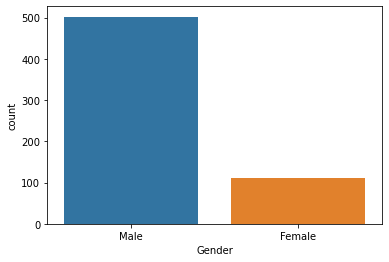

In [38]:
sns.countplot(df1['Gender'])

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

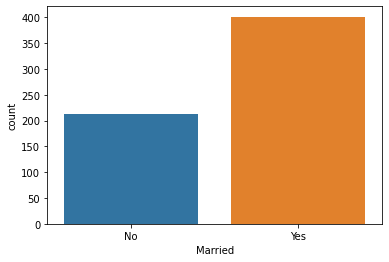

In [39]:
sns.countplot(df1['Married'])

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

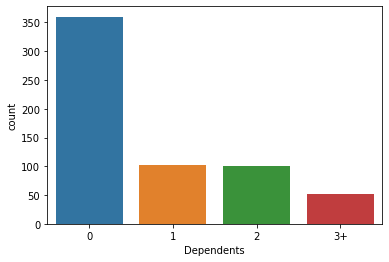

In [40]:
sns.countplot(df1['Dependents'])
df1['Dependents'].value_counts()

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_in_year', ylabel='count'>

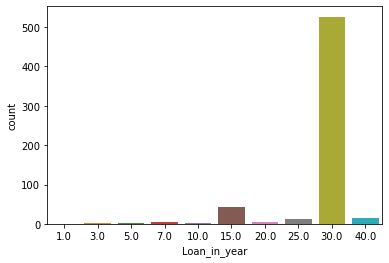

In [41]:
sns.countplot(df1['Loan_in_year'])

# numeric value data

In [42]:
import numpy as np
import pandas as pd

In [43]:
#histogram..
import matplotlib.pyplot as plt

In [44]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_in_year         0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
df1.duplicated().sum()

0

In [46]:
df1.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History,Property_Area,Loan_Status
481,Male,Yes,3+,Not Graduate,No,3095,0.0,113.0,30.0,1,Rural,Y
121,Female,No,0,Graduate,No,4166,0.0,44.0,30.0,1,Semiurban,Y
518,Male,No,0,Graduate,No,4683,1915.0,185.0,30.0,1,Semiurban,N
406,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,30.0,1,Urban,Y
74,Male,Yes,3+,Graduate,Yes,5266,1774.0,187.0,30.0,1,Semiurban,Y


{'whiskers': [<matplotlib.lines.Line2D at 0x212d83a4280>,
 'caps': [<matplotlib.lines.Line2D at 0x212d83a4790>,
 'boxes': [<matplotlib.lines.Line2D at 0x212d8394f70>],
 'medians': [<matplotlib.lines.Line2D at 0x212d83a4d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x212d83b4040>],
 'means': []}

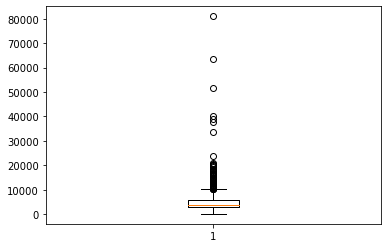

In [47]:
plt.boxplot(df1['ApplicantIncome'])

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

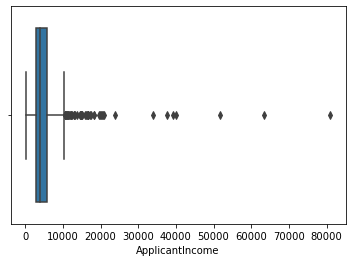

In [48]:
sns.boxplot(df1['ApplicantIncome']) 

C:\Users\123sa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

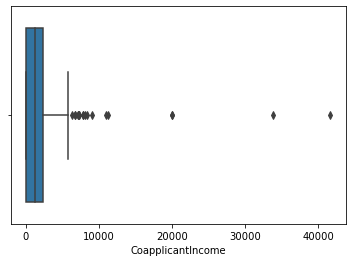

In [49]:
sns.boxplot(df1['CoapplicantIncome']) 

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <BarContainer object of 10 artists>)

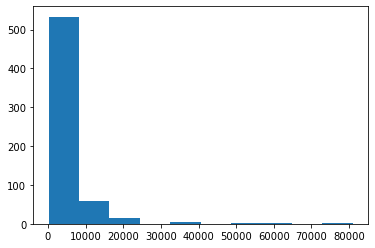

In [50]:
plt.hist(df1['ApplicantIncome'])

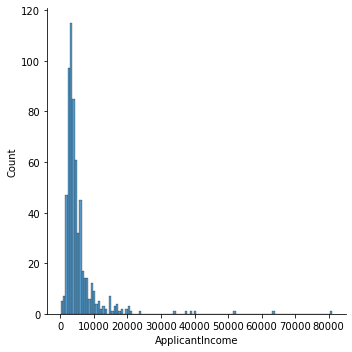

In [51]:
import seaborn as sns
sns.displot(df1['ApplicantIncome'])   #pdf - probability density function...

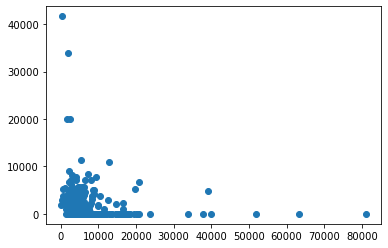

In [52]:
plt.scatter(df1['ApplicantIncome'], df1['CoapplicantIncome']) 

In [53]:
#df1['ApplicantIncome'].max()

In [54]:
#df1['ApplicantIncome'].min()

In [55]:
df1['ApplicantIncome'].skew()   #positivedly skewed towards right side...

6.539513113994625

In [56]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,28.534202,0.855049
std,6109.041673,2926.248369,84.107233,5.369052,0.352339
min,150.000000,0.000000,9.000000,1.000000,0.000000
25%,2877.500000,0.000000,100.250000,30.000000,1.000000
50%,3812.500000,1188.500000,128.000000,30.000000,1.000000
75%,5795.000000,2297.250000,164.750000,30.000000,1.000000
max,81000.000000,41667.000000,700.000000,40.000000,1.000000


In [57]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x212d875f850>,
 'caps': [<matplotlib.lines.Line2D at 0x212d875fdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212d875f640>],
 'medians': [<matplotlib.lines.Line2D at 0x212d876e3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x212d876e6a0>],
 'means': []}

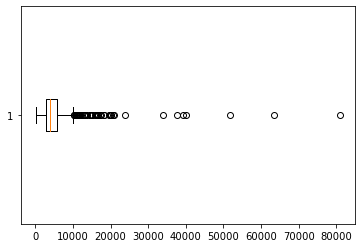

In [58]:
plt.boxplot(df1['ApplicantIncome'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x212d82a92b0>,
 'caps': [<matplotlib.lines.Line2D at 0x212d82a9c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x212d82b7d60>],
 'medians': [<matplotlib.lines.Line2D at 0x212d82a9a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x212d82a9f70>],
 'means': []}

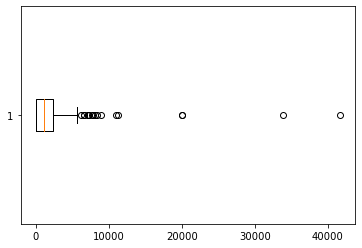

In [59]:
plt.boxplot(df1['CoapplicantIncome'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x212d8295b80>,
 'caps': [<matplotlib.lines.Line2D at 0x212d87c2160>,
 'boxes': [<matplotlib.lines.Line2D at 0x212d82958b0>],
 'medians': [<matplotlib.lines.Line2D at 0x212d87c2700>],
 'fliers': [<matplotlib.lines.Line2D at 0x212d87c29d0>],
 'means': []}

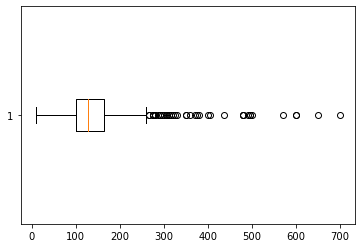

In [60]:
plt.boxplot(df1['LoanAmount'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x212d8813af0>,
 'caps': [<matplotlib.lines.Line2D at 0x212d88260d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212d8813820>],
 'medians': [<matplotlib.lines.Line2D at 0x212d8826670>],
 'fliers': [<matplotlib.lines.Line2D at 0x212d8826940>],
 'means': []}

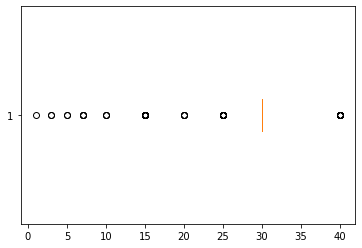

In [61]:
plt.boxplot(df1['Loan_in_year'], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x212d887df10>,
 'caps': [<matplotlib.lines.Line2D at 0x212d888b4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212d887dc40>],
 'medians': [<matplotlib.lines.Line2D at 0x212d888ba90>],
 'fliers': [<matplotlib.lines.Line2D at 0x212d888bd60>],
 'means': []}

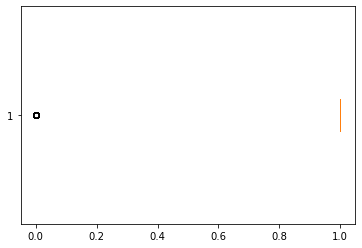

In [62]:
plt.boxplot(df1['Credit_History'], vert=False)

In [63]:
#for segrigating descrite continous and continous values
disc_column = [cname for cname in df1.columns if df1[cname].nunique() <= 25]
cont_column = [cname for cname in df1.columns if df1[cname].nunique() > 25]
cont_column

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [64]:
#for handling outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.5)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [65]:
some_list = ['ApplicantIncome', 'CoapplicantIncome']

for i in cont_column:
    df1 = remove_outlier(df1, i)

In [66]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,30.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1,Urban,Y


In [67]:
cont_column

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [68]:
#df1.to_csv('outdone.csv')
#for tomm continuation


In [69]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_in_year         0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
df1['Dependents'] = df1['Dependents'].replace({'3+': '3'})

In [71]:
#now train test splitting the data.
X = df1.drop(columns=['Loan_Status'])
y = df1['Loan_Status']
oce_columns = [cname for cname in X.columns if X[cname].dtype == 'object']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                random_state=42)

In [72]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History,Property_Area
259,Male,Yes,3,Not Graduate,No,4931,0.0,128.0,30.0,1,Semiurban
289,Male,No,0,Graduate,No,9508,0.0,187.0,30.0,1,Rural
70,Male,Yes,0,Graduate,No,3208,3066.0,172.0,30.0,1,Urban
495,Female,Yes,1,Graduate,No,3326,913.0,105.0,7.0,1,Semiurban
65,Male,Yes,0,Graduate,No,5726,4595.0,258.0,30.0,1,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
73,Male,Yes,3,Not Graduate,No,4755,0.0,95.0,30.0,0,Semiurban
108,Male,Yes,2,Graduate,No,3800,3600.0,216.0,30.0,0,Urban
283,Female,No,0,Graduate,No,1811,1666.0,54.0,30.0,1,Urban
460,Male,Yes,0,Graduate,Yes,2083,4083.0,160.0,30.0,1,Semiurban


In [73]:
y_train

259    N
289    Y
70     Y
495    Y
65     N
      ..
73     N
108    N
283    Y
460    Y
104    Y
Name: Loan_Status, Length: 462, dtype: object

In [74]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History,Property_Area
269,Female,No,1,Graduate,No,2876,1560.0,90.0,30.0,1,Urban
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,15.0,1,Rural
512,Male,Yes,2,Graduate,No,3283,2035.0,148.0,30.0,1,Urban
103,Male,Yes,0,Graduate,No,4652,3583.0,128.0,30.0,1,Semiurban
601,Male,Yes,0,Not Graduate,No,2894,2792.0,155.0,30.0,1,Rural
...,...,...,...,...,...,...,...,...,...,...,...
363,Male,Yes,0,Graduate,No,3013,3033.0,95.0,25.0,1,Urban
193,Male,No,0,Graduate,No,3858,0.0,76.0,30.0,1,Semiurban
467,Male,Yes,0,Graduate,No,16692,0.0,110.0,30.0,1,Semiurban
77,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,30.0,1,Urban


In [75]:
#now encoding..
#ordinal encoding..
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [76]:
oe = OrdinalEncoder()

In [77]:
X_train[oce_columns] = oe.fit_transform(X_train[oce_columns])

In [78]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History,Property_Area
259,1.0,1.0,3.0,1.0,0.0,4931,0.0,128.0,30.0,1,1.0
289,1.0,0.0,0.0,0.0,0.0,9508,0.0,187.0,30.0,1,0.0
70,1.0,1.0,0.0,0.0,0.0,3208,3066.0,172.0,30.0,1,2.0
495,0.0,1.0,1.0,0.0,0.0,3326,913.0,105.0,7.0,1,1.0
65,1.0,1.0,0.0,0.0,0.0,5726,4595.0,258.0,30.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
73,1.0,1.0,3.0,1.0,0.0,4755,0.0,95.0,30.0,0,1.0
108,1.0,1.0,2.0,0.0,0.0,3800,3600.0,216.0,30.0,0,2.0
283,0.0,0.0,0.0,0.0,0.0,1811,1666.0,54.0,30.0,1,2.0
460,1.0,1.0,0.0,0.0,1.0,2083,4083.0,160.0,30.0,1,1.0


In [79]:
X_test[oce_columns] = oe.transform(X_test[oce_columns])

In [80]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History,Property_Area
269,0.0,0.0,1.0,0.0,0.0,2876,1560.0,90.0,30.0,1,2.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,15.0,1,0.0
512,1.0,1.0,2.0,0.0,0.0,3283,2035.0,148.0,30.0,1,2.0
103,1.0,1.0,0.0,0.0,0.0,4652,3583.0,128.0,30.0,1,1.0
601,1.0,1.0,0.0,1.0,0.0,2894,2792.0,155.0,30.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
363,1.0,1.0,0.0,0.0,0.0,3013,3033.0,95.0,25.0,1,2.0
193,1.0,0.0,0.0,0.0,0.0,3858,0.0,76.0,30.0,1,1.0
467,1.0,1.0,0.0,0.0,0.0,16692,0.0,110.0,30.0,1,1.0
77,1.0,1.0,1.0,0.0,1.0,1000,3022.0,110.0,30.0,1,2.0


In [81]:
oe

OrdinalEncoder()

In [82]:

le = LabelEncoder()

In [83]:
le.fit(y_train)

LabelEncoder()

In [84]:
le.classes_

array(['N', 'Y'], dtype=object)

In [85]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [86]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_in_year,Credit_History,Property_Area
259,1.0,1.0,3.0,1.0,0.0,4931,0.0,128.0,30.0,1,1.0
289,1.0,0.0,0.0,0.0,0.0,9508,0.0,187.0,30.0,1,0.0
70,1.0,1.0,0.0,0.0,0.0,3208,3066.0,172.0,30.0,1,2.0
495,0.0,1.0,1.0,0.0,0.0,3326,913.0,105.0,7.0,1,1.0
65,1.0,1.0,0.0,0.0,0.0,5726,4595.0,258.0,30.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
73,1.0,1.0,3.0,1.0,0.0,4755,0.0,95.0,30.0,0,1.0
108,1.0,1.0,2.0,0.0,0.0,3800,3600.0,216.0,30.0,0,2.0
283,0.0,0.0,0.0,0.0,0.0,1811,1666.0,54.0,30.0,1,2.0
460,1.0,1.0,0.0,0.0,1.0,2083,4083.0,160.0,30.0,1,1.0


In [98]:
#data = np.array(0,1,2,1,1,3500,3000,95,20,1,0)

lr.predict([[0,0,1,0,1,500,300,500,50,0,0]])

C:\Users\123sa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
y_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_in_year']

X_train[col]
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train[col])

# # transform train and test sets
X_train[col] = scaler.transform(X_train[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_in_year']])
X_test[col] = scaler.transform(X_test[['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_in_year']])

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [88]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score
# fit the model with data
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\123sa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
print(lr.score(X_test, y_test))

0.8362068965517241


In [90]:
print(lr.score(X_train, y_train))

0.816017316017316


In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [92]:
print(clf.score(X_train, y_train))

1.0


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)   #

array([[19, 13],
       [23, 61]], dtype=int64)

In [94]:
dummy= pd.DataFrame(y_train)

In [95]:
dummy.value_counts()

1    316
0    146
dtype: int64

In [96]:
#imb data set handling. learn
#upsampling & down sampling. smote algo.


In [99]:
lr.predict([[0,0,1,0,1,500,300,500,50,0,0]])

C:\Users\123sa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])